Mini Portofolio Machine Learning Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [3]:
df = pd.read_csv('Product_Exclusive_Classification.csv')
df.info()

#split feature in order to easy process
nums = ['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']
cats = ['brand', 'category']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


## Describe Data

In [5]:
#describe to numeric feature
df[nums].describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [6]:
#describe to categoric feature
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


# Exploratory Data Analysis (EDA)

## Numerical Approach

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


Kita dapat melihat bahwa:
* Dataframe memiliki total 8000 baris dan 8 kolom
* Dataframe masih memiliki *null* values di kolom `category`,`rating`,`number_of_reviews`,`love`,`price`,`value_price`
* Target klasifikasi sepertinya adalah kolom `exclusive` dengan tipe data `int64`
* Berarti sisanya adalah *feature*

In [8]:
#split feature in order to easy process
dfnum = df[['rating','number_of_reviews','love','price','value_price','exclusive']]
dfcat = df[['brand','category']]

In [11]:
df.sample(10)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
7156,2250033,Kérastase,Shampoo,0.0,0.0,483.0,20.0,20.0,0
3126,1931237,HUDA BEAUTY,False Eyelashes,3.5,94.0,15100.0,18.0,18.0,1
201,789727,CLINIQUE,Moisturizers,4.5,3000.0,83000.0,28.0,28.0,0
3209,1942275,Anastasia Beverly Hills,Highlighter,4.0,137.0,21100.0,25.0,25.0,0
4526,2069151,amika,Hair Styling Products,4.0,27.0,3400.0,25.0,25.0,0
7541,2269900,Dr. Barbara Sturm,Face Serums,4.0,15.0,1500.0,350.0,350.0,0
1534,1683861,Josie Maran,Face Sunscreen,4.0,396.0,13000.0,36.0,36.0,1
6255,2197861,Klorane,Beauty Supplements,3.0,2.0,549.0,24.0,24.0,0
3522,1977255,Natasha Denona,Foundation,3.5,90.0,9700.0,45.0,45.0,0
1474,1673441,surratt beauty,Concealer,4.0,21.0,3000.0,50.0,50.0,0


Beberapa pengamatan:
* Target kita, `exclusive` benar bertipe `int64` dengan 2 nilai yaitu 0 dan 1, dimana 0 melambangkan `tidak exclusive` dan 1 melambangkan `exclusive`

In [12]:
dfnum.describe()

,rating,number_of_reviews,love,price,value_price,exclusive
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `number_of_reviews` dan `love` terlihat skewed (*mean* dan *median* cukup jauh)

In [13]:
dfcat.describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah brand `SEPHORA COLLECTION` (Top kolom `brand` adalah `SEPHORA COLLECTION` dengan frekuensi 492)
* Kedua kolom categorical memiliki jumlah nilai unik yang banyak

In [9]:
#looking values in categorical features
for col in dfcat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: brand, Length: 310, dtype: int64

Value count kolom category:
Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: category, Length: 142, dtype: int64



## Graphical Approach

### Univariate Analysis

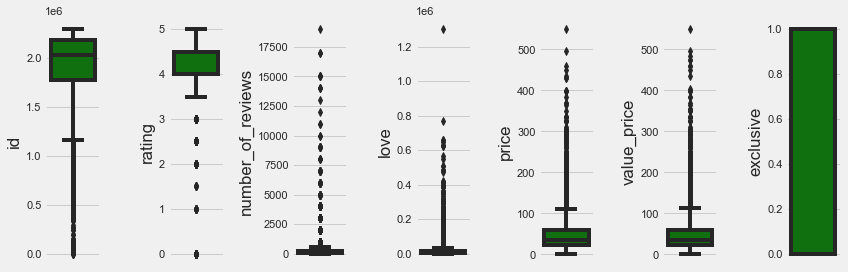

In [11]:
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Terlihat adanya outliers di `semua fitur` selain fitur `exclusive`

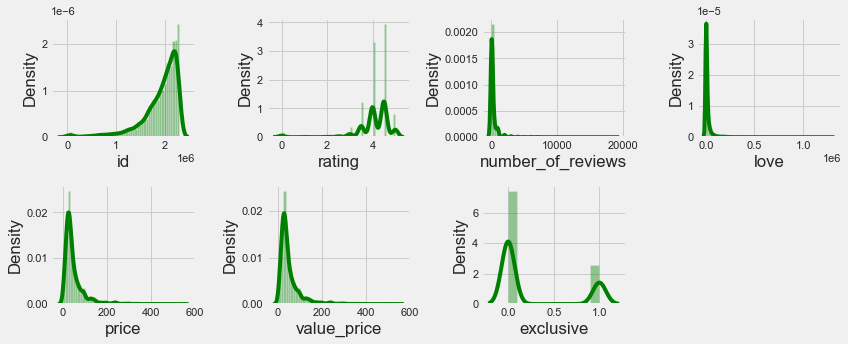

In [16]:
plt.figure(figsize = (12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

### Multivariate Analysis

<AxesSubplot:>

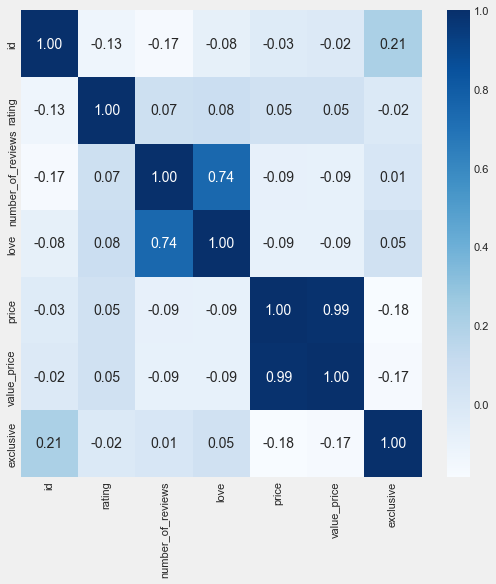

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot=True, fmt='.2f')

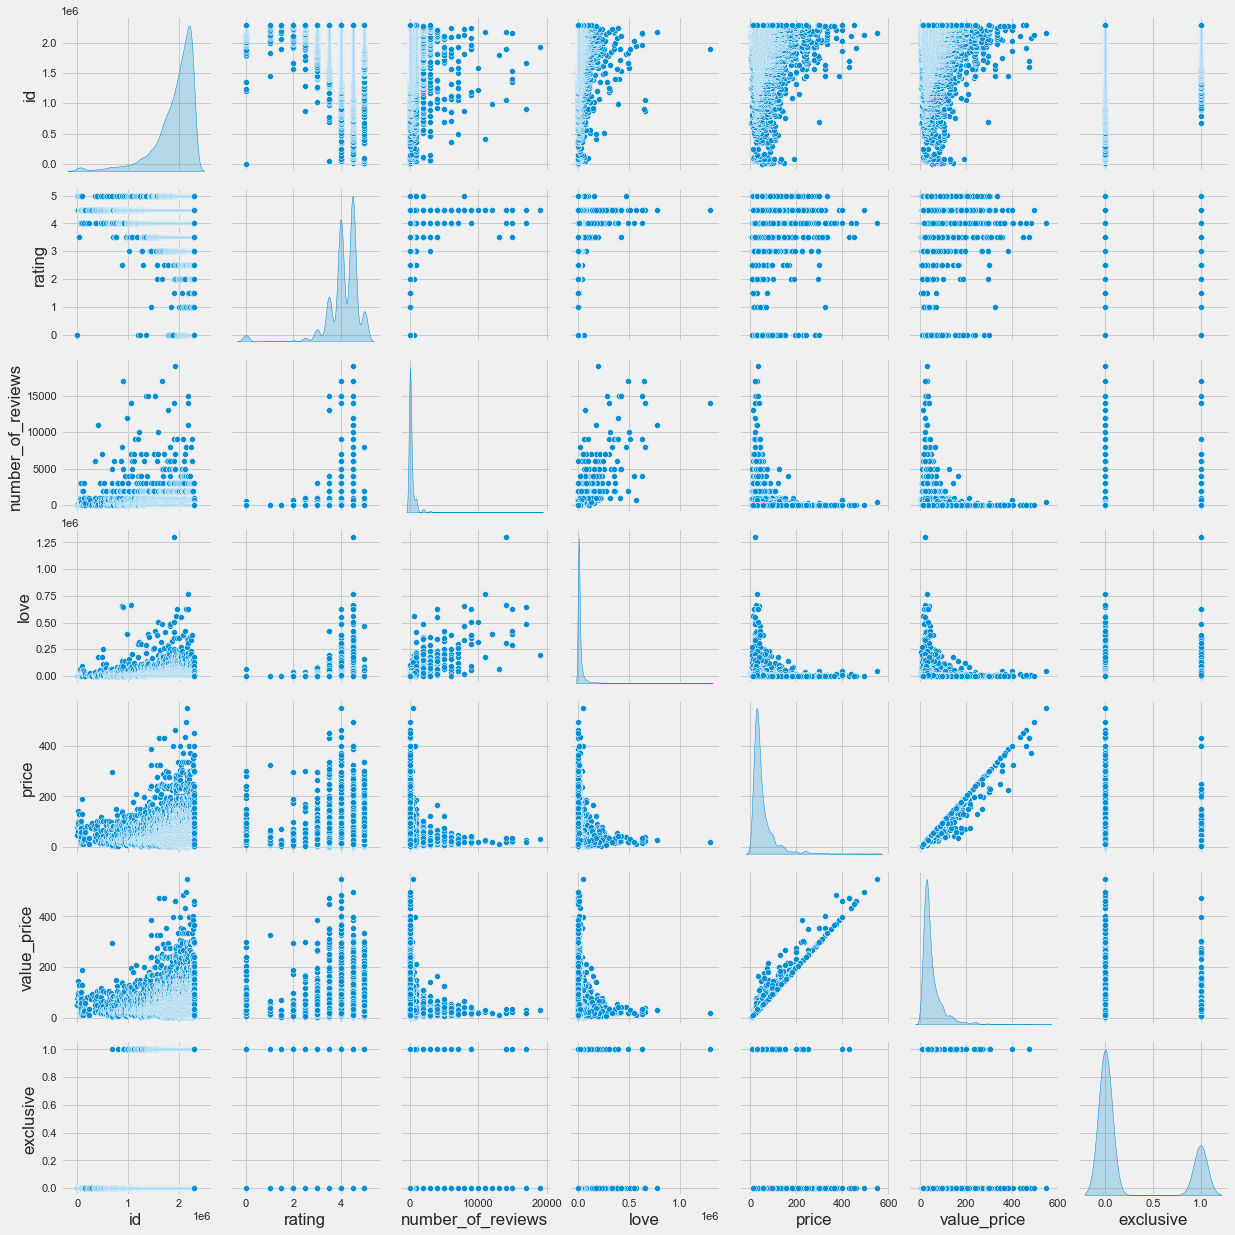

In [18]:
sns.pairplot(df, diag_kind='kde');

## Insight


* feature seperti love, number_of_reviews, price dan value_price distribusinya sedikit skewed
* fitur brand dan category memiliki unique value yang sangat banyak dan tidak terlaku berkorelasi dengan data target
* fitur love, price, value_price dan rating memiliki outlier yang sebaiknya dihilangkan
* value_price dan price memiliki korelasi 1, sehingga perlu dipilih salah 1 saja

# Data Preparation

## Missing Value

In [12]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

<h2>Input Missing Values Numeric</h2>

In [13]:
df['rating'].fillna(df['rating'].median(), inplace = True)
df['number_of_reviews'].fillna(df['number_of_reviews'].median(), inplace = True)
df['love'].fillna(df['love'].median(), inplace = True)
df['price'].fillna(df['price'].median(), inplace = True)
df['value_price'].fillna(df['value_price'].median(), inplace = True)

In [14]:
df.isna().sum()

id                    0
brand                 0
category             13
rating                0
number_of_reviews     0
love                  0
price                 0
value_price           0
exclusive             0
dtype: int64

<h2>Input Missing Values Categoric</h2>

In [15]:
df['category'].fillna(df['category'].mode()[0], inplace = True)

In [16]:
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

## Duplicate Values

In [17]:
print('Jumlah ID awal:', df.duplicated(subset = ['id']).sum())
df.drop_duplicates(subset = 'id', inplace = True)
print('Jumlah ID akhir:', df.duplicated(subset = ['id']).sum())

Jumlah ID awal: 49
Jumlah ID akhir: 0


## Handling Outliers

In [18]:
df_copy = df.copy()

<h2>Using IQR</h2>

<AxesSubplot:xlabel='love', ylabel='Density'>

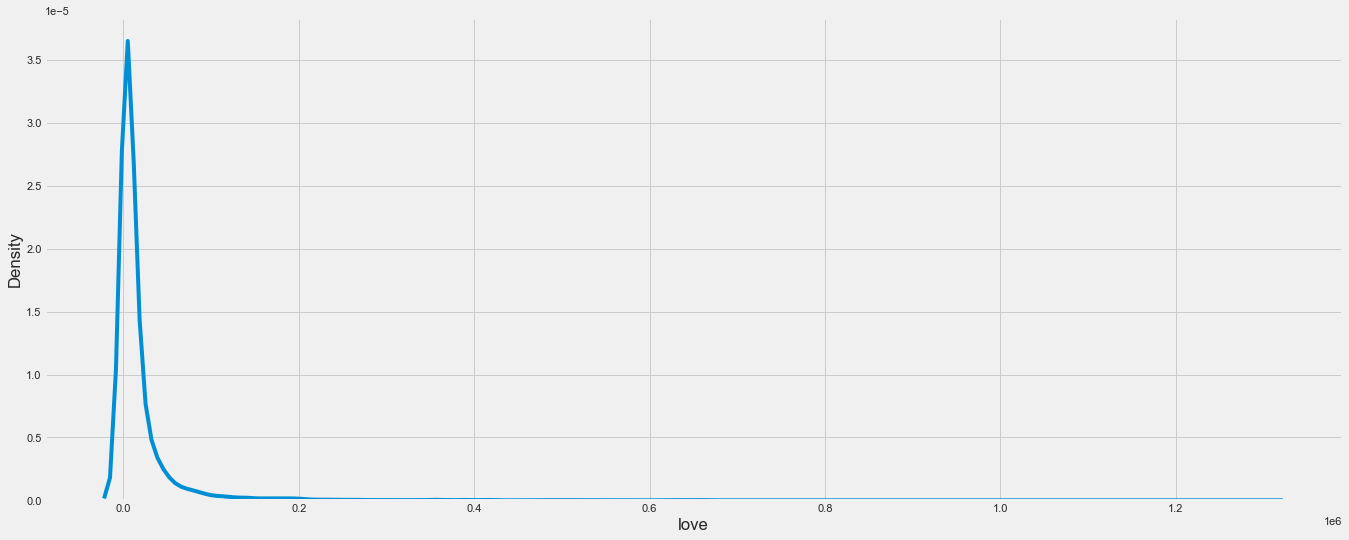

In [19]:
sns.kdeplot('love', data = df_copy)

In [20]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

filtered_entries = np.array([True] * len(df))
for col in ['love','price','rating']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print('Jumlah baris setelah memfilter outlier menggunakan IQR:', len(df))

Jumlah baris sebelum memfilter outlier: 7951
Jumlah baris setelah memfilter outlier menggunakan IQR: 5949


<h2>If Using Z-Score</h2>

In [21]:
print('Jumlah baris sebelum memfilter outlier:', len(df_copy))

filtered_entries = np.array([True] * len(df_copy))

for col in nums:
    zscore = abs(stats.zscore(df_copy[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_copy = df_copy[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print('Jumlah baris setelah memfilter outlier meggunakan z-score:', len(df_copy))

Jumlah baris sebelum memfilter outlier: 7951
Jumlah baris setelah memfilter outlier meggunakan z-score: 7263


## Scalling (Normalization/Standardization)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,5.949000e+03,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000
mean,1.910257e+06,4.222222,156.082031,8135.897630,40.177169,41.135398,0.257186
std,3.941422e+05,0.423388,339.097938,8165.107899,23.619268,24.967831,0.437120
min,5.000000e+01,3.500000,1.000000,0.000000,2.000000,2.000000,0.000000
25%,1.772383e+06,4.000000,15.000000,2100.000000,24.000000,24.000000,0.000000
50%,2.032167e+06,4.000000,49.000000,5100.000000,34.000000,34.000000,0.000000
75%,2.186823e+06,4.500000,156.000000,11600.000000,52.000000,54.000000,1.000000
max,2.293793e+06,5.000000,8000.000000,35200.000000,111.000000,218.000000,1.000000


In [25]:
#using normalization
df['love'] = MinMaxScaler().fit_transform(df['love'].values.reshape(len(df), 1))
df['price'] = MinMaxScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['rating'] = MinMaxScaler().fit_transform(df['rating'].values.reshape(len(df), 1))

In [31]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,5.949000e+03,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000,5949.000000
mean,1.910257e+06,0.481481,156.082031,0.231133,0.350249,41.135398,0.257186
std,3.941422e+05,0.282259,339.097938,0.231963,0.216691,24.967831,0.437120
min,5.000000e+01,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
25%,1.772383e+06,0.333333,15.000000,0.059659,0.201835,24.000000,0.000000
50%,2.032167e+06,0.333333,49.000000,0.144886,0.293578,34.000000,0.000000
75%,2.186823e+06,0.666667,156.000000,0.329545,0.458716,54.000000,1.000000
max,2.293793e+06,1.000000,8000.000000,1.000000,1.000000,218.000000,1.000000


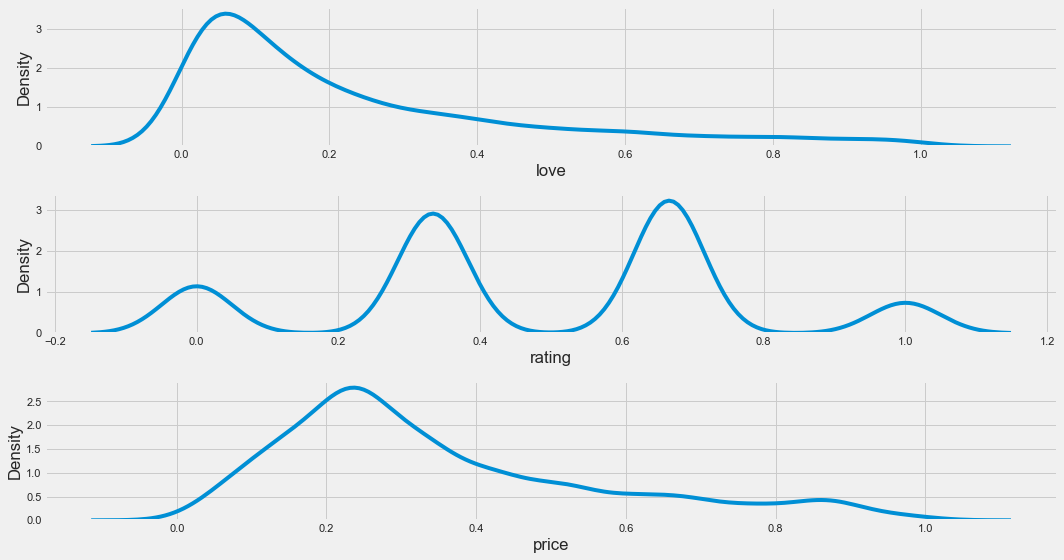

In [26]:
fig, axes = plt.subplots(3, # number of rows
                    1, # number of columns
                     figsize=(15, 8))
sns.kdeplot((df['love']), ax=axes[0])
sns.kdeplot((df['rating']), ax=axes[1])
sns.kdeplot((df['price']), ax=axes[2])
plt.tight_layout()

## Feature encoding

In [27]:
#using label encoding
df['brand_label'] = df['brand'].astype('category').cat.codes
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,brand_label
0,50,SEPHORA COLLECTION,no category,1.000000,46.0,0.000000,0.440367,50.0,0,218
5,6528,Givenchy,Perfume,0.666667,94.0,0.085227,0.697248,78.0,0,97
6,7393,BVLGARI,Cologne,1.000000,31.0,0.093750,0.844037,94.0,0,20
7,7740,Yves Saint Laurent,Perfume,0.666667,164.0,0.119318,0.550459,62.0,0,278
8,11023,Carolina Herrera,Perfume,0.666667,127.0,0.082386,0.770642,86.0,0,41


In [28]:
#using label encoding
df['category_label'] = df['category'].astype('category').cat.codes
df

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,brand_label,category_label
0,50,SEPHORA COLLECTION,no category,1.000000,46.0,0.000000,0.440367,50.0,0,218,138
5,6528,Givenchy,Perfume,0.666667,94.0,0.085227,0.697248,78.0,0,97,116
6,7393,BVLGARI,Cologne,1.000000,31.0,0.093750,0.844037,94.0,0,20,27
7,7740,Yves Saint Laurent,Perfume,0.666667,164.0,0.119318,0.550459,62.0,0,278,116
8,11023,Carolina Herrera,Perfume,0.666667,127.0,0.082386,0.770642,86.0,0,41,116
...,...,...,...,...,...,...,...,...,...,...,...
7993,2293181,VOLUSPA,Candles & Home Scents,0.333333,14.0,0.090909,0.146789,18.0,0,261,23
7994,2293199,VOLUSPA,Candles,1.000000,1.0,0.002614,0.761468,85.0,0,261,22
7996,2293439,TOM FORD,Lipstick,0.333333,30.0,0.352273,0.486239,55.0,0,244,100
7997,2293488,FENTY BEAUTY by Rihanna,Lip Sets,0.666667,22.0,0.366477,0.247706,34.0,1,86,96


## Class imbalance

In [35]:
df['exclusive'].value_counts()

0    4419
1    1530
Name: exclusive, dtype: int64

In [37]:
df['exclusive_class'] = df['exclusive'] > 0
df['exclusive_class'].value_counts()

False    4419
True     1530
Name: exclusive_class, dtype: int64

In [39]:
x = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['exclusive', 'exclusive_class']]]
y = df['exclusive_class'].values
print(x.shape)
print(y.shape)

(5949, 8)
(5949,)


In [40]:
from imblearn import under_sampling, over_sampling
x_und, y_und = under_sampling.RandomUnderSampler(0.5).fit_resample(x,y)
x_ov, y_ov = over_sampling.RandomOverSampler(0.5).fit_resample(x,y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x,y)

In [41]:
x.head()

,id,rating,number_of_reviews,love,price,value_price,brand_label,category_label
0,50,1.000000,46.0,0.000000,0.440367,50.0,218,138
5,6528,0.666667,94.0,0.085227,0.697248,78.0,97,116
6,7393,1.000000,31.0,0.093750,0.844037,94.0,20,27
7,7740,0.666667,164.0,0.119318,0.550459,62.0,278,116
8,11023,0.666667,127.0,0.082386,0.770642,86.0,41,116


In [42]:
y

array([False, False, False, ..., False,  True, False])

In [43]:
print('Original data')
print(pd.Series(y).value_counts())

Original data
False    4419
True     1530
dtype: int64


In [44]:
print('undersampling')
print(pd.Series(y_und).value_counts())

undersampling
False    3060
True     1530
dtype: int64


In [45]:
print('oversampling')
print(pd.Series(y_ov).value_counts())

oversampling
False    4419
True     2209
dtype: int64


In [46]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
False    4419
True     2209
dtype: int64


In [48]:
2209/(2209+4419)

0.33328304164152084

# Conclusion

3 pre-processing yang paling memberikan impact:

* EDA sangat penting karena kita harus mengerti datanya untuk bisa melakukan data preparation yang tepat
* missing input value berpengaruh besar, data ini memiliki 176 value yang hilang, ini perlu diisi agar data lebih mudah diolah dan hasilnya sesuai dengan yang kita inginkan
<br>
* mengihilangkan outlier dengan metode IQR karena diketahui terdapat 3 fitur yang terlalu skewed dengan hasil penghilangan outlier seperti 
** Jumlah baris sebelum memfilter outlier: 7951
** Jumlah baris setelah memfilter outlier: 5949